In [15]:
import pandas as pd
df = pd.read_csv('BritishAirwaysNew.csv')
df.head()

,overall_rating,title,author,country,time_published,trip_verified,body,Aircraft,type_of_traveller,seat_type,...,seat_comfort,cabin_staff_service,food_and_beverages,Inflight Entertainment,ground_service,wifi_and_connectivity,value_for_money,recommended,takeoff,destination
0,1,"""trained to give you the runaround""",T Cayle,United States,2023-04-17,Trip Verified,Worst experience of my life trying to deal wit...,Null,Family Leisure,Economy Class,...,2,5,2,3,4,1,1,no,London,Denver
1,3,"""they only had one choice of meal""",Andrew Pybus,Hong Kong,2023-04-17,Trip Verified,Due to code sharing with Cathay Pacific I was ...,Null,Solo Leisure,Economy Class,...,2,1,1,1,2,1,2,no,Hong Kong,London
2,4,"""relentless BA cost cutting""",M Edwards,United Kingdom,2023-04-16,Trip Verified,LHR check in was quick at the First Wing and q...,A320,Business,Business Class,...,3,3,4,Null,3,1,2,no,London,Malaga
3,3,"""I wouldn't recommend British Airways""",Luis Rojas,United Kingdom,2023-04-15,Trip Verified,I wouldn't recommend British Airways at all. I...,Null,Family Leisure,Economy Class,...,4,4,Null,1,3,3,1,no,Santorini,London
4,1,"""Absolutely horrible experience""",C Maire,United States,2023-04-15,Trip Verified,Absolutely horrible experience. I booked a tic...,Null,Solo Leisure,Economy Class,...,3,3,2,Null,1,Null,1,no,Madrid,Belfast


# EDA

In [2]:
#Checking basic info about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3528 entries, 0 to 3527
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   overall_rating          3528 non-null   object
 1   title                   3528 non-null   object
 2   author                  3528 non-null   object
 3   country                 3528 non-null   object
 4   time_published          3528 non-null   object
 5   trip_verified           3528 non-null   object
 6   body                    3528 non-null   object
 7   Aircraft                3528 non-null   object
 8   type_of_traveller       3528 non-null   object
 9   seat_type               3528 non-null   object
 10  route                   3528 non-null   object
 11  date_flown              3528 non-null   object
 12  seat_comfort            3528 non-null   object
 13  cabin_staff_service     3528 non-null   object
 14  food_and_beverages      3528 non-null   object
 15  Infl

In [3]:
#Checking for missing values
print(df.isnull().sum())

overall_rating            0
title                     0
author                    0
country                   0
time_published            0
trip_verified             0
body                      0
Aircraft                  0
type_of_traveller         0
seat_type                 0
route                     0
date_flown                0
seat_comfort              0
cabin_staff_service       0
food_and_beverages        0
Inflight Entertainment    0
ground_service            0
wifi_and_connectivity     0
value_for_money           0
recommended               0
takeoff                   0
destination               0
dtype: int64


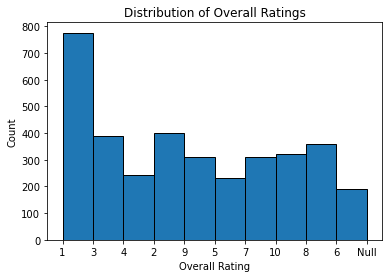

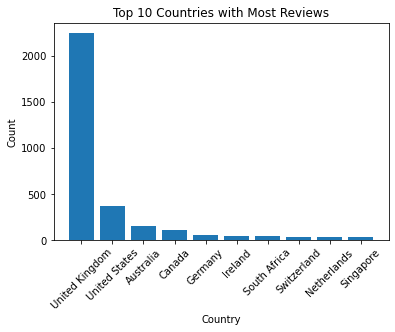

In [4]:
#Exploring the distribution of ratings using histograms
import matplotlib.pyplot as plt

plt.hist(df['overall_rating'], bins=10, range=(0, 10), edgecolor='black')
plt.xlabel('Overall Rating')
plt.ylabel('Count')
plt.title('Distribution of Overall Ratings')
plt.show()

country_counts = df['country'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values)
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Top 10 Countries with Most Reviews')
plt.xticks(rotation=45)
plt.show()


# DATA PREPROCESSING 

In [17]:
import re
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')  # Download the tokenizer data


def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)
    text = re.sub(r'\d+', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text.strip()


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\habay\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [18]:

#Converting text to lowercase
df['cleaned_body'] = df['body'].apply(lambda x: clean_text(x.lower()))

In [19]:

#Tokenizing the text
df['tokenized_body'] = df['cleaned_body'].apply(lambda x: word_tokenize(x))

In [20]:
print(df[['body', 'cleaned_body', 'tokenized_body']].head())


                                                body  \
0  Worst experience of my life trying to deal wit...   
1  Due to code sharing with Cathay Pacific I was ...   
2  LHR check in was quick at the First Wing and q...   
3  I wouldn't recommend British Airways at all. I...   
4  Absolutely horrible experience. I booked a tic...   

                                        cleaned_body  \
0  worst experience of my life trying to deal wit...   
1  due to code sharing with cathay pacific i was ...   
2  lhr check in was quick at the first wing and q...   
3  i wouldnt recommend british airways at all i t...   
4  absolutely horrible experience i booked a tick...   

                                      tokenized_body  
0  [worst, experience, of, my, life, trying, to, ...  
1  [due, to, code, sharing, with, cathay, pacific...  
2  [lhr, check, in, was, quick, at, the, first, w...  
3  [i, wouldnt, recommend, british, airways, at, ...  
4  [absolutely, horrible, experience, i, booked, ..

# SENTIMENT ANALYSIS

In [20]:
def process_long_sequence(sequence, max_length, stride=256):
    num_chunks = (len(sequence) - max_length) // stride + 1
    chunks = [sequence[i:i + max_length] for i in range(0, num_chunks * stride, stride)]
    sentiments = []
    for chunk in chunks:
        if len(chunk) <= max_length:
            sentiments.extend(sentiment_analyzer(" ".join(map(str, chunk))))
    return sentiments


In [21]:
# Performing sentiment analysis on each review
max_sequence_length = 512  # Setting the desired maximum sequence length
df['tokenized_body'] = df['tokenized_body'].apply(lambda x: truncate_sequence(x, max_sequence_length))
df['sentiment'] = df['tokenized_body'].apply(lambda x: process_long_sequence(x, max_sequence_length))

df['overall_sentiment'] = df['sentiment'].apply(lambda x: sum([s['score'] for s in x]) / len(x) if len(x) > 0 else None)

print(df[['cleaned_body', 'overall_sentiment']].head())


RuntimeError: The size of tensor a (547) must match the size of tensor b (512) at non-singleton dimension 1

In [22]:
def simple_sentiment_analysis(text, positive_words, negative_words):
    words = text.lower().split()
    num_positive = sum(word in positive_words for word in words)
    num_negative = sum(word in negative_words for word in words)
    
    if num_positive > num_negative:
        return "positive"
    elif num_positive < num_negative:
        return "negative"
    else:
        return "neutral"


In [23]:
positive_words = ["good", "happy", "excellent", "positive"]
negative_words = ["bad", "sad", "poor", "negative"]

df['sentiment'] = df['cleaned_body'].apply(lambda x: simple_sentiment_analysis(x, positive_words, negative_words))

print(df[['cleaned_body', 'sentiment']].head())


                                        cleaned_body sentiment
0  worst experience of my life trying to deal wit...   neutral
1  due to code sharing with cathay pacific i was ...   neutral
2  lhr check in was quick at the first wing and q...  positive
3  i wouldnt recommend british airways at all i t...  negative
4  absolutely horrible experience i booked a tick...   neutral


In [28]:
from transformers import pipeline

# Loading the pre-trained sentiment analysis model (BERT)
sentiment_analyzer = pipeline("sentiment-analysis")

# Example text for sentiment analysis
example_text = "I absolutely love this product. It's amazing!"

# Perform sentiment analysis on the example text
sentiment_result = sentiment_analyzer(example_text)

# Extract the sentiment score from the result
sentiment_score = sentiment_result[0]["score"]
sentiment_label = sentiment_result[0]["label"]

print(f"Sentiment Score: {sentiment_score:.2f}")
print(f"Sentiment Label: {sentiment_label}")


No model was supplied, defaulted to distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


Sentiment Score: 1.00
Sentiment Label: POSITIVE


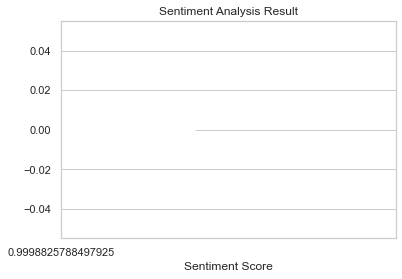

In [29]:
# Plotting the sentiment score using a bar chart
plt.figure(figsize=(6, 4))
sns.barplot(x=[sentiment_score], y=[0], palette="coolwarm")
plt.xlim(0, 1)
plt.xticks(np.arange(0, 1.1, 0.1))
plt.xlabel("Sentiment Score")
plt.title("Sentiment Analysis Result")
plt.show()


# TOPIC MODELING

In [2]:
pip install hdbscan

  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
Failed to build hdbscan
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\habay\anaconda3\python.exe' 'C:\Users\habay\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\habay\AppData\Local\Temp\tmp6p0i9zh6'
       cwd: C:\Users\habay\AppData\Local\Temp\pip-install-t68nzkdi\hdbscan_dd5592229bae41018e193940aa861c46
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan

In [5]:
pip install umap-learn sentence-transformers hdbscan bertopic

  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\habay\anaconda3\python.exe' 'C:\Users\habay\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\habay\AppData\Local\Temp\tmpcc5u_uyk'
       cwd: C:\Users\habay\AppData\Local\Temp\pip-install-yyar5_nf\hdbscan_f7ea32cfd1074b62bfb0e9944810b5db
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan

    Preparing wheel metadata: finished with status 'done'
  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached torchvision-0.15.2-cp38-cp38-win_amd64.whl (1.2 MB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)
Failed to build hdbscan


  copying hdbscan\tests\test_hdbscan.py -> build\lib.win-amd64-cpython-38\hdbscan\tests
  copying hdbscan\tests\test_prediction_utils.py -> build\lib.win-amd64-cpython-38\hdbscan\tests
  copying hdbscan\tests\test_rsl.py -> build\lib.win-amd64-cpython-38\hdbscan\tests
  copying hdbscan\tests\__init__.py -> build\lib.win-amd64-cpython-38\hdbscan\tests
  running build_ext
  cythoning hdbscan/_hdbscan_tree.pyx to hdbscan\_hdbscan_tree.c
  cythoning hdbscan/_hdbscan_linkage.pyx to hdbscan\_hdbscan_linkage.c
  cythoning hdbscan/_hdbscan_boruvka.pyx to hdbscan\_hdbscan_boruvka.c
  cythoning hdbscan/_hdbscan_reachability.pyx to hdbscan\_hdbscan_reachability.c
  cythoning hdbscan/_prediction_utils.pyx to hdbscan\_prediction_utils.c
  cythoning hdbscan/dist_metrics.pyx to hdbscan\dist_metrics.c
  building 'hdbscan._hdbscan_tree' extension
  C:\Users\habay\AppData\Local\Temp\pip-build-env-r26vf6pd\overlay\Lib\site-packages\Cython\Compiler\Main.py:369: FutureWarning: Cython directive 'language_le

In [6]:
pip install bertopic

  Using cached bertopic-0.15.0-py2.py3-none-any.whl (143 kB)
  Using cached sentence_transformers-2.2.2-py3-none-any.whl
  Using cached umap_learn-0.5.3-py3-none-any.whl
  Using cached hdbscan-0.8.33.tar.gz (5.2 MB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
    Preparing wheel metadata: started
    Preparing wheel metadata: finished with status 'done'
  Using cached torchvision-0.15.2-cp38-cp38-win_amd64.whl (1.2 MB)
  Using cached pynndescent-0.5.10-py3-none-any.whl
Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: urllib3<1.27,>=1.21.1 in c:\users\habay\anaconda3\lib\site-packages (from requests->huggingface-hub>=0.4.0->sentence-transformers>=0.4.1->bertopic) (1.26.4)
  Using cached torch-2.0.1-cp38-cp38-win_amd64.whl (172.4 MB)
Failed to build hdbscan



  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\habay\anaconda3\python.exe' 'C:\Users\habay\anaconda3\lib\site-packages\pip\_vendor\pep517\_in_process.py' build_wheel 'C:\Users\habay\AppData\Local\Temp\tmpo83lbfgr'
       cwd: C:\Users\habay\AppData\Local\Temp\pip-install-_sd811eh\hdbscan_4a430804fde34871be48ca5f4ef95008
  Complete output (40 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build\lib.win-amd64-cpython-38
  creating build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\flat.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\hdbscan_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\plots.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\prediction.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\robust_single_linkage_.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan\validity.py -> build\lib.win-amd64-cpython-38\hdbscan
  copying hdbscan

In [8]:
from bertopic import BERTopic

# Create a BERTopic model and fit it on the tokenized text data
model = BERTopic()
topics, _ = model.fit_transform(df['tokenized_body'])

# Assign the topics back to the DataFrame
df['topic'] = topics

# Print the DataFrame with topics
print(df[['cleaned_body', 'topic']])


ModuleNotFoundError: No module named 'bertopic'

In [7]:
conda install -c conda-forge hdbscan


^C

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install hdbscan --only-binary :all:


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement hdbscan
ERROR: No matching distribution found for hdbscan


Topic model without transformers 

In [13]:
pip install gensim


Note: you may need to restart the kernel to use updated packages.


In [21]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.parsing.preprocessing import preprocess_string

# Preprocess the text data
def preprocess_text(text):
    text = text.lower()
    text = preprocess_string(text)
    return text

df['cleaned_body'] = df['cleaned_body'].apply(preprocess_text)

# Create a dictionary from the preprocessed text
dictionary = corpora.Dictionary(df['cleaned_body'].tolist())

# Create a bag-of-words representation for each document
corpus = [dictionary.doc2bow(text) for text in df['cleaned_body'].tolist()]

# Train the LDA model on the corpus
num_topics = 10 
lda_model = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10, random_state=42)

def get_most_probable_topic(lda_model, corpus):
    topic_probs = [lda_model.get_document_topics(doc) for doc in corpus]
    return [max(probs, key=lambda x: x[1])[0] for probs in topic_probs]

df['topic'] = get_most_probable_topic(lda_model, corpus)

print(df[['cleaned_body', 'topic']])


                                           cleaned_body  topic
0     [worst, experi, life, try, deal, custom, servi...      9
1     [code, share, cathai, pacif, downgrad, return,...      5
2     [lhr, check, quick, wing, quickli, secur, loun...      1
3     [wouldnt, recommend, british, airwai, tri, cus...      9
4     [absolut, horribl, experi, book, ticket, exped...      9
...                                                 ...    ...
3523  [lhrjfklaxlhr, check, apart, snap, earli, chec...      4
3524  [lhr, ham, purser, address, club, passeng, boa...      8
3525  [son, work, british, airwai, urg, fly, british...      4
3526  [london, citynew, york, jfk, shannon, nice, se...      2
3527  [sinlhr, class, old, aircraft, seat, privat, c...      2

[3528 rows x 2 columns]


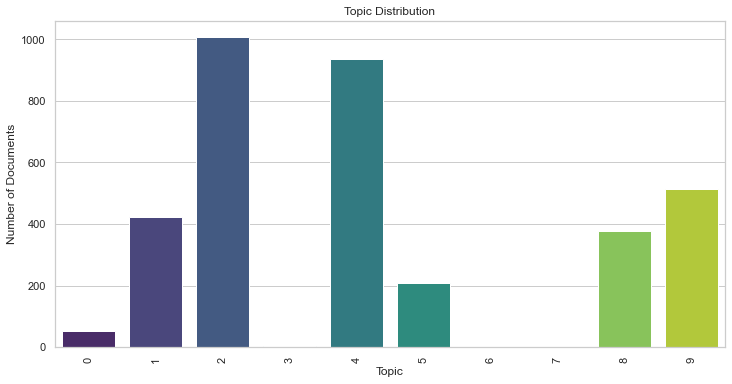

NameError: name 'model' is not defined

In [32]:
# Count the number of documents per topic
topic_counts = df['topic'].value_counts()

plt.figure(figsize=(12, 6))
sns.barplot(x=topic_counts.index, y=topic_counts.values, palette="viridis")
plt.xticks(rotation=90)
plt.xlabel("Topic")
plt.ylabel("Number of Documents")
plt.title("Topic Distribution")
plt.show()

# Create a word cloud for each topic
for topic_id, topic_keywords in model.get_topic_info().iterrows():
    plt.figure(figsize=(8, 6))
    wordcloud = WordCloud(width=800, height=600, background_color='white').generate(topic_keywords['Words'])
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.title(f"Topic {topic_id} Keywords")
    plt.show()


# Named Entity Recognition with BERT

In [23]:
pip install transformers


Note: you may need to restart the kernel to use updated packages.


In [24]:
from transformers import pipeline

# Load the pre-trained NER model (BERT)
ner_model = pipeline("ner", model="dslim/bert-base-NER")

# Function to extract entities from text
def extract_entities(text):
    entities = ner_model(text)
    return [(entity["word"], entity["entity"]) for entity in entities]

example_text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976."

entities = extract_entities(example_text)

for word, entity in entities:
    print(f"{word}: {entity}")


C:\Users\habay\anaconda3\lib\site-packages\huggingface_hub\file_download.py:133: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\habay\.cache\huggingface\hub. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to see activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)


Apple: B-ORG
Inc: I-ORG
American: B-MISC
Cup: B-LOC
##ert: I-LOC
##ino: I-LOC
California: B-LOC
Steve: B-PER
Job: I-PER
##s: I-PER
Steve: B-PER
W: I-PER
##oz: I-PER
##nia: I-PER
##k: I-PER
Ronald: B-PER
Wayne: I-PER


# Visualization

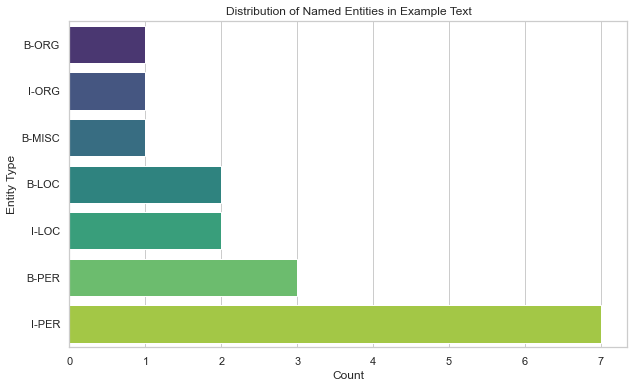

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

def extract_entities_with_counts(text):
    entities = ner_model(text)
    entity_counts = {}
    for entity in entities:
        entity_type = entity["entity"]
        if entity_type in entity_counts:
            entity_counts[entity_type] += 1
        else:
            entity_counts[entity_type] = 1
    return entity_counts

example_text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976."

entity_counts = extract_entities_with_counts(example_text)

# Plotting the distribution of named entities
plt.figure(figsize=(10, 6))
sns.barplot(x=list(entity_counts.values()), y=list(entity_counts.keys()), palette="viridis")
plt.xlabel("Count")
plt.ylabel("Entity Type")
plt.title("Distribution of Named Entities in Example Text")
plt.show()


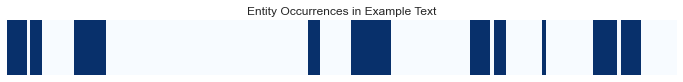

In [26]:
import numpy as np

def create_entity_heatmap(text, entities):
    heatmap = np.zeros(len(text))
    
    # Mark the positions of entities in the heatmap
    for entity in entities:
        entity_text = entity["word"]
        start_pos = text.find(entity_text)
        end_pos = start_pos + len(entity_text)
        heatmap[start_pos:end_pos] = 1
    
    return heatmap

example_text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976."

# Extract entities from the example text
entities = ner_model(example_text)

heatmap = create_entity_heatmap(example_text, entities)

plt.figure(figsize=(12, 1))
sns.heatmap([heatmap], cmap="Blues", cbar=False, xticklabels=False, yticklabels=False)
plt.title("Entity Occurrences in Example Text")
plt.show()


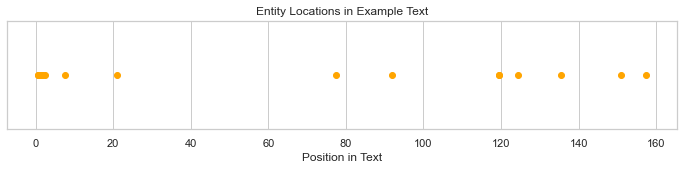

In [27]:
def create_entity_scatter_plot(text, entities):
    positions = []
    labels = []
    
    for entity in entities:
        entity_text = entity["word"]
        start_pos = text.find(entity_text)
        end_pos = start_pos + len(entity_text)
        positions.append((start_pos + end_pos) / 2)
        labels.append(entity["entity"])
    
    return positions, labels

example_text = "Apple Inc. is an American multinational technology company headquartered in Cupertino, California. It was founded by Steve Jobs, Steve Wozniak, and Ronald Wayne in 1976."

entities = ner_model(example_text)

# Create the scatter plot for entity locations
positions, labels = create_entity_scatter_plot(example_text, entities)

plt.figure(figsize=(12, 2))
plt.scatter(positions, [1] * len(positions), marker="o", c="orange")
plt.yticks([])
plt.xlabel("Position in Text")
plt.title("Entity Locations in Example Text")
plt.show()
